# DS-SF-34 | 14 | Clustering | Assignment | Starter Code

## Clustering on the Iris dataset

In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, decomposition, cluster

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In this assignment, we will be clustering irises using their petal's and sepal's length and width.  Because clustering is an unsupervised learning method, we will hold on the species outcome.  However, we hope that the structure that clustering will reveal to do similar to the irises species.

In [24]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-14-iris.csv'))

> ## Question.  Perform Principal Component Analysis (PCA).  Using the first-principle component for $k$-Means with $k=3$, compare the resulting clusters to the irises species.  Conclude.

In [21]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLength,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidth,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLength,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidth,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [38]:
# TODO
    # first take only the feature set
X = df[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

In [39]:
    # do PCA on this df
pca = decomposition.PCA().fit(X)
X_prime = pca.transform(X)
   # up to # of features that you have
X_columns = ['PC0','PC1','PC2','PC3']
X_prime = pd.DataFrame(X_prime, columns = X_columns)
pca.components_


array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

(-0.01, 0.9346162071742683)

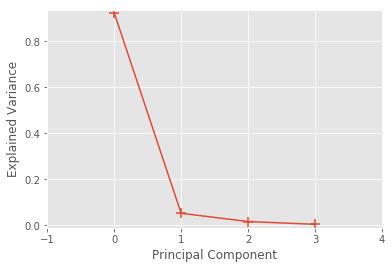

In [42]:
normalized_var = pca.explained_variance_ratio_
plt.plot(normalized_var)
plt.scatter(x = range(len(normalized_var)),
    y = normalized_var,
    marker = '+',
    s = 100)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.xlim(-1, len(normalized_var))
plt.ylim(-.01, max(normalized_var) + .01)


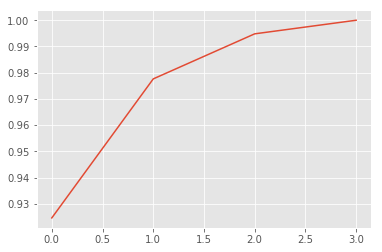

In [43]:
   # plot of cumulative normalized variance explained
normalized_var = pca.explained_variance_ratio_
cumulated_normalized_var = np.cumsum(normalized_var)
plt.plot(cumulated_normalized_var)


In [45]:
   # normalize in preparation for K-Means
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X, columns = X_columns)


In [46]:
X.head()

,PC0,PC1,PC2,PC3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [34]:
  # take only the first component
X.drop(['PC1', 'PC2'], axis = 1, inplace = True)


Answer:  TODO

In [35]:
model = cluster.KMeans(n_clusters = 3, random_state = 0).fit(X)

cluster_ = pd.Series(model.labels_)

color = cluster_.map({0: 'red', 1: 'green', 2: 'blue'})



In [36]:
cluster_.value_counts()


0    62
1    50
2    38
dtype: int64